In [3]:
!pip install d2l==1.0.3


In [4]:
import torch
from d2l import torch as d2l

In [5]:
X = torch.tensor([[1.0, 2.0, 3.0], [4.0, 5.0, 6.0]])
X.sum(0, keepdims=True), X.sum(1, keepdims=True)

(tensor([[5., 7., 9.]]),
 tensor([[ 6.],
         [15.]]))

In [6]:
def softmax(X):
    X_exp = torch.exp(X)
    partition = X_exp.sum(1, keepdims=True)
    return X_exp / partition  # The broadcasting mechanism is applied here

In [7]:
X = torch.rand((2, 5))
X_prob = softmax(X)
X_prob, X_prob.sum(1)

(tensor([[0.1698, 0.2111, 0.1664, 0.2711, 0.1816],
         [0.1963, 0.1100, 0.2331, 0.2350, 0.2257]]),
 tensor([1.0000, 1.0000]))

In [8]:
class SoftmaxRegressionScratch(d2l.Classifier):
    def __init__(self, num_inputs, num_outputs, lr, sigma=0.01):
        super().__init__()
        self.save_hyperparameters()
        self.W = torch.normal(0, sigma, size=(num_inputs, num_outputs),
                              requires_grad=True)
        self.b = torch.zeros(num_outputs, requires_grad=True)

    def parameters(self):
        return [self.W, self.b]

In [9]:
# The code below defines how the network maps each input to an output
@d2l.add_to_class(SoftmaxRegressionScratch)
def forward(self, X):
    X = X.reshape((-1, self.W.shape[0]))
    return softmax(torch.matmul(X, self.W) + self.b)

In [10]:
y = torch.tensor([0, 2])
y_hat = torch.tensor([[0.1, 0.3, 0.6], [0.3, 0.2, 0.5]])
y_hat[[0, 1], y]

tensor([0.1000, 0.5000])

In [11]:
# Averaging over the logarithms of the selected probabilities
def cross_entropy(y_hat, y):
    return -torch.log(y_hat[list(range(len(y_hat))), y]).mean()

cross_entropy(y_hat, y)

tensor(1.4979)

In [12]:
@d2l.add_to_class(SoftmaxRegressionScratch)
def loss(self, y_hat, y):
    return cross_entropy(y_hat, y)

[37.15445399284363, 37.36361503601074, 37.85551619529724, 36.88143801689148, 37.12741494178772]


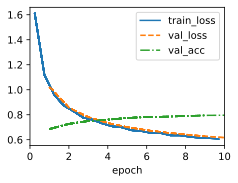

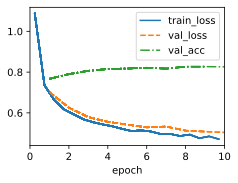

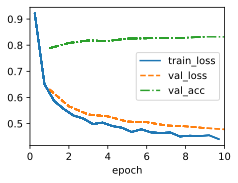

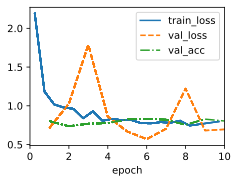

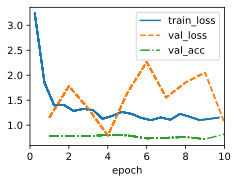

In [14]:
import time
data = d2l.FashionMNIST(batch_size=256)

#Loop over different learning rates
learning_rates = [0.01, 0.05, 0.1, 0.5, 0.75]
elapsed_times = []
#Print plot of val_loss at each learning rate
for lr in learning_rates:
    start_time=time.time()
    model = SoftmaxRegressionScratch(num_inputs=784, num_outputs=10, lr=lr)
    trainer = d2l.Trainer(max_epochs=10)
    trainer.fit(model, data)
    end_time = time.time()
    elapsed_time = end_time - start_time
    elapsed_times.append(elapsed_time)
print(elapsed_times)
    

In [15]:
X, y = next(iter(data.val_dataloader()))
preds = model(X).argmax(axis=1)
preds.shape

torch.Size([256])

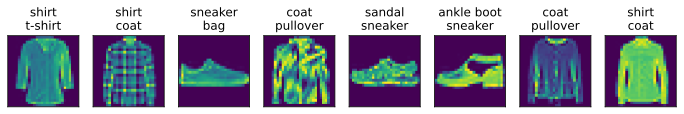

In [16]:
wrong = preds.type(y.dtype) != y
X, y, preds = X[wrong], y[wrong], preds[wrong]
labels = [a+'\n'+b for a, b in zip(
    data.text_labels(y), data.text_labels(preds))]
data.visualize([X, y], labels=labels)